In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, TimeDistributed
import model

tf.__version__

'2.3.0'

In [2]:
def generateArma(
    n,
    obsCoef,
    noiseCoef,
    noiseGenFunc,
    noiseGenParams,
    obsFunc = None,
    noiseFunc = None
):

    p = len(obsCoef)
    q = len(noiseCoef)    
    
    x = np.zeros(n)
    eps = np.zeros(n)

    for t in range(n):

        obsVal = 0
        for i in range(min(t, p)):
            obsVal += obsCoef[i] * x[t - i - 1]
        
        if obsFunc is not None:
            obsVal = obsFunc(obsVal)
        x[t] += obsVal
        
        noiseVal = 0
        for j in range(min(t, q)):
            noiseVal += noiseCoef[j] * eps[t - j - 1]

        if noiseFunc is not None:
            noiseVal = noiseFunc(noiseVal)
        x[t] += noiseVal

        eps[t] = noiseGenFunc(*noiseGenParams)
        x[t] += eps[t]

    return x

In [3]:
n = 10000
P = 50
Q = 50

In [4]:
obsCoef = np.concatenate([
    np.random.uniform(-0.1, 0, size = P // 2),
    np.random.uniform(0, 0.1, size = P // 2)
])

noiseCoef = np.concatenate([
    np.random.uniform(-0.01, 0, size = Q // 2),
    np.random.uniform(0, 0.01, size = Q // 2)
])

noiseGenFunc = np.random.lognormal
noiseGenParams = (1.0, 1.0)

In [5]:
trainSeq = generateArma(n, obsCoef, noiseCoef, noiseGenFunc, noiseGenParams)

Plotting Sequence


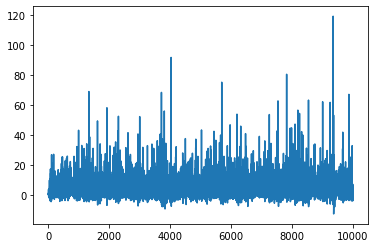

In [6]:
print('Plotting Sequence')
plt.plot(trainSeq)
plt.show()

In [7]:
x = trainSeq[:n-1, np.newaxis]
y = trainSeq[1:, np.newaxis]

In [8]:
timeModel = model.Model(
    memorySize = 80,
    windowSize = 5,
    threshold = 20,
    inputDimension = 1,
    hiddenStateSize = 20,
    extremeValueIndex = 3.0,
    optimizer = tf.keras.optimizers.Adam(),
    extremeLossWeight = 2.0
)

In [9]:
timeModel.train(x, y, 200, verbose = 2, modelFilepath = 'trainModel.model')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

start timestep: 6 | end timestep: 205  | time taken:  97.85 sec | Loss: 1388145.375
start timestep: 206 | end timestep: 405  | time taken:  93.51 sec | Loss: 1334139.75
start timestep: 406 | end timestep: 605  | time taken:  95.00 sec | Loss: 2166101.75
start timestep: 606 | end timestep: 805  | time taken:  95.11 sec | Loss: 1433490.875
start timestep: 806 | end timestep: 1005  | time taken:  102.01 sec | Loss: 2418018.75
start timestep: 1006 | end timestep: 1205  | time taken:  96.52 sec | Loss: 19814

In [15]:
yPred = timeModel.predict(x[:200])

In [16]:
yTrue = y[:200]

In [17]:
np.set_printoptions(suppress=True)
print(np.expand_dims(yPred, axis = 1))

[[ 0.11067849]
 [-0.00239918]
 [-0.0860831 ]
 [ 0.00313125]
 [ 0.17173678]
 [-0.16664608]
 [-0.20600557]
 [-0.12916213]
 [-0.08450159]
 [-0.42644948]
 [-0.28183728]
 [-0.2614778 ]
 [-0.19573915]
 [-0.04713871]
 [-0.3905662 ]
 [-0.27871192]
 [-0.22140567]
 [-0.4229338 ]
 [-0.18195304]
 [-0.03814106]
 [-0.05981431]
 [-0.25321403]
 [-0.53106475]
 [-0.5745921 ]
 [-0.47239172]
 [-0.172115  ]
 [-0.2827744 ]
 [-0.12224867]
 [-0.23470578]
 [-0.2955761 ]
 [-0.32456076]
 [-0.03418563]
 [-0.02834402]
 [-0.22894397]
 [-0.00122152]
 [-0.1028553 ]
 [ 0.01603961]
 [-0.29482347]
 [-0.4497766 ]
 [-0.67704767]
 [-0.2424591 ]
 [-0.01174719]
 [-0.6860429 ]
 [-0.26602834]
 [-0.30780095]
 [-0.45900202]
 [-0.28505814]
 [-0.26678002]
 [ 0.01290992]
 [ 0.08364994]
 [-0.39714012]
 [-0.59204304]
 [-0.39459386]
 [-0.5697954 ]
 [-0.282387  ]
 [-1.1568853 ]
 [-0.3317136 ]
 [-0.11936736]
 [-0.23858374]
 [-0.6530139 ]
 [-0.18806072]
 [-0.2336546 ]
 [-0.30123633]
 [-0.28474396]
 [-0.36432788]
 [-0.28427175]
 [-0.20898

In [18]:
print(yTrue)

[[ 0.41388403]
 [ 0.22856966]
 [ 1.27829276]
 [ 3.97687543]
 [ 0.21849163]
 [ 0.59347579]
 [ 1.47458924]
 [ 1.94445683]
 [-0.76299606]
 [ 0.44795131]
 [ 0.2799765 ]
 [ 0.9223639 ]
 [ 2.93588594]
 [-0.25892554]
 [ 1.08590572]
 [ 1.45543327]
 [-0.27030101]
 [ 2.75638686]
 [ 4.0093173 ]
 [ 2.97930331]
 [ 1.20369423]
 [-0.72174665]
 [-1.35601742]
 [-1.61289836]
 [-0.29392785]
 [-0.90412644]
 [ 0.62865306]
 [ 0.18011629]
 [ 0.1011268 ]
 [-0.01105787]
 [ 7.96726575]
 [ 2.83415381]
 [ 1.07063144]
 [10.11006644]
 [ 2.30678259]
 [ 6.52330642]
 [ 0.92193789]
 [ 0.1900781 ]
 [-1.94174005]
 [ 0.92495641]
 [ 4.88144972]
 [-1.36027575]
 [ 5.9961826 ]
 [ 1.52706893]
 [ 0.21440202]
 [ 2.20246745]
 [ 1.91721602]
 [11.14344635]
 [ 4.86396102]
 [-0.080955  ]
 [-1.22290399]
 [ 8.20977456]
 [ 0.04860741]
 [ 7.33835139]
 [-3.60705651]
 [ 0.42691203]
 [ 1.20328033]
 [ 0.76683167]
 [-1.61855072]
 [ 3.67511743]
 [ 1.55046018]
 [ 1.15786672]
 [ 1.41543356]
 [ 0.62821117]
 [ 1.45472584]
 [ 2.15039494]
 [17.57298